<a href="https://colab.research.google.com/github/carvalheirafc/data_science_min_projects/blob/master/keyword_extraction_nlp/keyword_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Automated keyword extraction using Natural Language Processing.
### An article from  [medium.com](https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34) 

### About the Dataset:

> In this article, we will be extracting keywords from a dataset that contains about 3,800 abstracts. The original dataset is from Kaggle — NIPS Paper. Neural Information Processing Systems (NIPS) is one of the top machine learning conferences in the world. This dataset includes the title and abstracts for all NIPS papers to date (ranging from the first 1987 conference to the current 2016 conference).

> The original dataset also contains the article text. However, since the focus is on understanding the concept of keyword extraction and using the full article text could be computationally intensive, only abstracts have been used for NLP modelling. The same code block can be used on the full article text to get a better and enhanced keyword extraction.

### First we need a clever way to import our files to colab runtime.


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download --force -d benhamner/nips-papers
!unzip /content/nips-papers.zip

In [92]:
import pandas as pd

nips_papers_file = 'papers.csv'
dataset = pd.read_csv(nips_papers_file)
dataset.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [96]:
# First we need to remove the value 'AbstractMissing' From the Dataframe
dataset.replace('AbstractMissing', pd.NaT, inplace=True)
dataset.dropna(inplace=True)
dataset.reset_index(drop=True,inplace=True)
dataset.head()

index    id  year                                              title  \
0   4261  4857  2013  Scalable Influence Estimation in Continuous-Ti...   
1   4262  4858  2013                            Adaptive Anonymity via    
2   4263  4859  2013  Exact and Stable Recovery of Pairwise Interact...   
3   4265  4860  2013        Matrix factorization with binary components   
4   4266  4861  2013  On the Complexity and Approximation of Binary ...   

  event_type                                           pdf_name  \
0       Oral  4857-scalable-influence-estimation-in-continuo...   
1  Spotlight         4858-adaptive-anonymity-via-b-matching.pdf   
2  Spotlight  4859-exact-and-stable-recovery-of-pairwise-int...   
3  Spotlight  4860-matrix-factorization-with-binary-componen...   
4  Spotlight  4861-on-the-complexity-and-approximation-of-bi...   

                                            abstract  \
0  If a piece of information is released from a m...   
1  The adaptive anonymity problem is formalized w...   
2  Tensor completion from incomplete observations...   
3  Motivated by an application in computational b...   
4  Lifted inference algorithms exploit symmetries...   

                                          paper_text  
0  Scalable Influence Estimation in\nContinuous-T...  
1  Adaptive Anonymity via b-Matching\n\nKrzysztof...  
2  Exact and Stable Recovery of Pairwise Interact...  
3  Matrix factorization with Binary Components\n\...  
4  On the Complexity and Approximation of\nBinary...

In [0]:
# Create a new variable with a word count of each abstract
# lambda function cacth every string and split into words tokens, and than return the lenght.
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(' ')))


In [99]:
dataset_extra['word_count'].describe()

count    7241.000000
mean       81.331308
std        80.297257
min         2.000000
25%         2.000000
50%        89.000000
75%       148.000000
max       317.000000
Name: word_count, dtype: float64

In [85]:
# Join all string in 'abstract' variable, than split in separated words, to count each occurrance.
# Store this result in a series words_frequency.

words_frequency = pd.Series(''.join(dataset['abstract']).split()).value_counts()
words_frequency.head()

the    18675
of     12766
a      10116
and     8785
to      8155
dtype: int64

### Now we need to remove the text noise.
> Remove words like, **the**, **and**, **a**, etc... are not relevant.

Continue here the explanation....
  
  
  

In [100]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Creation of a set with a stopwords in english texts.
stop_words = set(stopwords.words('english'))


In [0]:
corpus = []
total_words = int(dataset['word_count'].describe()['count'])
for it in range(0, total_words):
  text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][it])
  text = text.lower()
  #Remove Tags
  text =re.sub('&lt;/?.*?&gt;',' &lt;&gt; ',text)
  
  #Remove special characters and digits
  text =re.sub('(\\d|\\W)+',' ',text)
  text = text.split()
  
  lem = WordNetLemmatizer()
  
  # lemmatize words in entire string of text
  
  text = [lem.lemmatize(word) for word in text if not word in stop_words] 
  text = ' '.join(text)
    
  corpus.append(text)
  

In [113]:
corpus[10]

'latent variable prediction model multi layer network impose auxiliary latent variable input output allow automatic inference implicit feature useful prediction unfortunately model difficult train inference latent variable must performed concurrently parameter optimization creating highly non convex problem instead proposing another local training method develop convex relaxation hidden layer conditional model admits global training approach extends current convex modeling approach handle two nested nonlinearities separated non trivial adaptive latent layer resulting method able acquire two layer model cannot represented single layer model feature improving training quality local heuristic'

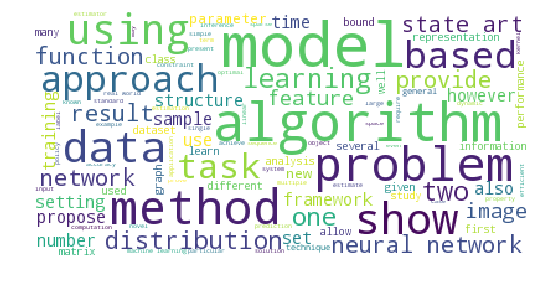

In [130]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud( background_color='white',
                       stopwords=stop_words,
                       max_words=100,
                       max_font_size=50, 
                       random_state=42).generate(str(corpus))

plt.figure(dpi=80)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()